In [1]:
from humanize import intword
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import statsmodels.api as sm
import dotenv
import warnings
import missingno as msno
import os

In [2]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

dotenv.load_dotenv()

True

In [3]:
apartamentos = pd.read_csv('../data/processed/metrocuadrado/venta_apartamentos_bogota.csv')
apartamentos.shape

(11776, 50)

In [4]:
apartamentos.head(3)

,precio,habitaciones,baños,estrato,codigo,antiguedad,area_m2,administracion,parqueaderos,piso,...,longitud,descripcion,localidad,barrio,distancia_estacion_tm_m,estacion_tm_cercana,cerca_estacion_tm,distancia_paradero_sitp_m,paradero_sitp_cercano,cerca_paradero_sitp
0,820000000.0,3.0,3.0,6.0,10677-M3878516,Entre 0 y 5 años,96.0,603653.0,2.0,4.0,...,-74.046180,Vendo espectacular apartamento ubicado cerca d...,USAQUEN,SANTA BARBARA OCCIDENTAL,944.50,Calle 127,0,325.41,CARRERA 16A,0
1,835000000.0,3.0,3.0,5.0,2259-M3843923,Entre 5 y 10 años,114.0,600000.0,2.0,7.0,...,-74.108025,Venta de este espectacular Apartamento de 114 ...,TEUSAQUILLO,CIUDAD SALITRE SURORIENTAL,833.08,Salitre - El Greco,0,70.02,ZONA IND. SREDNI,1
2,269000000.0,2.0,2.0,3.0,399-M4081020,Entre 0 y 5 años,53.0,150000.0,1.0,11.0,...,-74.158000,Hermoso apto en piso 11 para estrenar con vist...,KENNEDY,S.C. OSORIO II - LA MAGDALENA CIUDAD TINTAL,1907.33,Biblioteca Tintal,0,106.87,EL PORVENIR,1


In [5]:
apartamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11776 entries, 0 to 11775
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   precio                        11776 non-null  float64
 1   habitaciones                  11774 non-null  float64
 2   baños                         11760 non-null  float64
 3   estrato                       11746 non-null  float64
 4   codigo                        11776 non-null  object 
 5   antiguedad                    11769 non-null  object 
 6   area_m2                       11775 non-null  float64
 7   administracion                10562 non-null  float64
 8   parqueaderos                  10381 non-null  float64
 9   piso                          6318 non-null   float64
 10  amoblado                      11776 non-null  int64  
 11  sauna                         11776 non-null  int64  
 12  jacuzzi                       11776 non-null  int64  
 13  d

In [6]:
apartamentos.columns

Index(['precio', 'habitaciones', 'baños', 'estrato', 'codigo', 'antiguedad',
       'area_m2', 'administracion', 'parqueaderos', 'piso', 'amoblado',
       'sauna', 'jacuzzi', 'deposito', 'vista_exterior', 'closets',
       'calefaccion', 'estufa', 'vigilancia', 'numero_ascensores',
       'cerca_parque', 'cerca_centros_comerciales',
       'cerca_colegios_universidades', 'cerca_supermercados',
       'zona_residencial', 'sobre_via_secundaria', 'sobre_via_principal',
       'zc_zonas_verdes', 'zc_salon_comunal', 'zc_gimnasio', 'zc_zonas_bbq',
       'zc_zonas_infantiles', 'zc_cancha_squash', 'acceso_discapacitados',
       'vista_panoramica', 'terraza_balcon', 'area_terraza_balcon', 'terraza',
       'parqueadero_visitantes', 'latitud', 'longitud', 'descripcion',
       'localidad', 'barrio', 'distancia_estacion_tm_m', 'estacion_tm_cercana',
       'cerca_estacion_tm', 'distancia_paradero_sitp_m',
       'paradero_sitp_cercano', 'cerca_paradero_sitp'],
      dtype='object')

In [7]:
intword(apartamentos['precio'].sum(), format='%.1f')

'19.4 trillion'

In [23]:
apartamentos.groupby('localidad').agg({'precio': 'count'}).sort_values('precio', ascending=False)

,precio
localidad,
USAQUEN,4083
CHAPINERO,2975
SUBA,1991
TEUSAQUILLO,511
KENNEDY,423
FONTIBON,376
ENGATIVA,341
BOSA,225
BARRIOS UNIDOS,182


In [21]:
estadisticas_precio_loc = apartamentos.groupby('localidad').agg({'precio': ['mean', 'median', 'std', 'min', 'max']})
estadisticas_precio_loc = estadisticas_precio_loc.applymap(lambda x: intword(x, format='%.2f'))
estadisticas_precio_loc

precio                                   
                              mean          median             std   
localidad                                                            
ANTONIO NARINO      423.63 million  265.00 million  463.81 million  \
BARRIOS UNIDOS      600.38 million  503.50 million  581.89 million   
BOSA                151.95 million  129.00 million  116.20 million   
CANDELARIA            1.26 billion  715.00 million    1.26 billion   
CHAPINERO             4.39 billion    1.40 billion   85.29 billion   
CIUDAD BOLIVAR      240.06 million  180.00 million  159.31 million   
ENGATIVA            325.63 million  283.00 million  187.11 million   
FONTIBON            523.54 million  430.00 million  404.36 million   
KENNEDY             309.25 million  220.00 million  442.64 million   
LOS MARTIRES        257.27 million  171.56 million  223.84 million   
PUENTE ARANDA       557.81 million  400.00 million  539.02 million   
RAFAEL URIBE URIBE  446.12 million  256.30 million  545.01 million   
SAN CRISTOBAL       436.97 million  231.00 million  470.36 million   
SANTA FE            688.34 million  440.00 million  846.75 million   
SUBA                624.14 million  478.00 million  515.94 million   
TEUSAQUILLO         554.33 million  500.00 million  341.54 million   
TUNJUELITO          285.50 million  257.50 million  136.55 million   
USAQUEN             945.42 million  700.00 million  805.21 million   
USME                763.71 million  139.00 million    1.24 billion   

                                                    
                               min             max  
localidad                                           
ANTONIO NARINO      178.00 million    2.26 billion  
BARRIOS UNIDOS      168.00 million    7.50 billion  
BOSA                 90.30 million    1.31 billion  
CANDELARIA          190.00 million    6.30 billion  
CHAPINERO             1.10 million   3.00 trillion  
CIUDAD BOLIVAR      146.00 million  895.00 million  
ENGATIVA            110.00 million    1.70 billion  
FONTIBON            124.80 million    3.50 billion  
KENNEDY             100.00 million    4.50 billion  
LOS MARTIRES          1.45 million    1.35 billion  
PUENTE ARANDA       140.00 million    3.00 billion  
RAFAEL URIBE URIBE   95.00 million    2.80 billion  
SAN CRISTOBAL       110.00 million    1.60 billion  
SANTA FE            139.00 million    8.00 billion  
SUBA                100.00 million    7.20 billion  
TEUSAQUILLO         133.00 million    5.20 billion  
TUNJUELITO          150.00 million  560.00 million  
USAQUEN               1.50 million   12.50 billion  
USME                 80.00 million    7.20 billion

In [10]:
def detectar_valores_atipicos(data, row, localidad, threshold):
    """
    Detecta valores atípicos en los precios de los apartamentos para una localidad específica.
    
    Args:
        data: Un DataFrame que contiene los datos de los apartamentos.
        localidad: La localidad específica para la cual se desea detectar los valores atípicos.
        threshold: El umbral para considerar un valor atípico (por ejemplo, z-score > 1).
    
    Returns:
        Un DataFrame que contiene los valores atípicos detectados.
    """
    localidad_data = data[data['localidad'] == localidad]
    z_scores = stats.zscore(localidad_data[row])
    outliers = np.abs(z_scores) > threshold

    # Convertir los precios a formato de miles, comentar si no se desea
    # localidad_data['precio'] = localidad_data['precio'].apply(lambda x: intword(x, format='%.2f'))

    return localidad_data[outliers]

In [19]:
apartamentos = apartamentos.drop(apartamentos.loc[apartamentos['codigo'] == '847-M4362348'].index)

In [24]:
detectar_valores_atipicos(apartamentos, 'precio', 'USME', 3)

,precio,habitaciones,baños,estrato,codigo,antiguedad,area_m2,administracion,parqueaderos,piso,...,longitud,descripcion,localidad,barrio,distancia_estacion_tm_m,estacion_tm_cercana,cerca_estacion_tm,distancia_paradero_sitp_m,paradero_sitp_cercano,cerca_paradero_sitp
4024,7.200000e+09,2.0,3.0,6.0,10139-M3930332,Entre 0 y 5 años,327.0,NaN,4.0,NaN,...,-74.099785,Apartamento con terraza 360 grados de 142m2 qu...,USME,CASALOMA_,3932.86,Portal de Usme,0,28.19,BR. CASALOMA,1


In [21]:
intword(apartamentos['administracion'].sum(), format='%.2f')

'50.02 billion'

In [20]:
apartamentos.loc[apartamentos['administracion'] == 940, 'administracion'] = 940000

In [22]:
estadisticas_administracion_loc = apartamentos.groupby('localidad').agg({'administracion': ['mean', 'median', 'std', 'min', 'max']})
estadisticas_administracion_loc = estadisticas_administracion_loc.applymap(lambda x: intword(x, format='%.2f'))
estadisticas_administracion_loc

administracion                                     
                               mean           median              std   
localidad                                                               
ANTONIO NARINO      261.79 thousand  126.00 thousand  392.24 thousand  \
BARRIOS UNIDOS      436.96 thousand  350.00 thousand  319.51 thousand   
BOSA                 73.93 thousand   61.00 thousand   34.04 thousand   
CANDELARIA          983.03 thousand  715.00 thousand     1.04 million   
CHAPINERO              8.81 million     1.10 million   121.64 million   
CIUDAD BOLIVAR      181.05 thousand  120.00 thousand  236.74 thousand   
ENGATIVA               1.93 million  190.00 thousand    20.66 million   
FONTIBON               4.39 million  285.50 thousand    40.52 million   
KENNEDY             210.98 thousand  129.00 thousand  396.67 thousand   
LOS MARTIRES           1.38 million  166.00 thousand    11.31 million   
PUENTE ARANDA       380.93 thousand  297.00 thousand  326.54 thousand   
RAFAEL URIBE URIBE  425.66 thousand  237.50 thousand  427.27 thousand   
SAN CRISTOBAL       299.94 thousand  136.00 thousand  354.39 thousand   
SANTA FE            471.29 thousand  322.50 thousand  491.91 thousand   
SUBA                   2.45 million  390.00 thousand    32.70 million   
TEUSAQUILLO            2.86 million  320.00 thousand    28.41 million   
TUNJUELITO          135.62 thousand  116.00 thousand  118.00 thousand   
USAQUEN                4.80 million  660.00 thousand    78.19 million   
USME                630.14 thousand   78.00 thousand     1.05 million   

                                                      
                                min              max  
localidad                                             
ANTONIO NARINO       95.00 thousand     1.35 million  
BARRIOS UNIDOS       25.00 thousand     2.16 million  
BOSA                 37.00 thousand  355.00 thousand  
CANDELARIA          120.00 thousand     6.63 million  
CHAPINERO            10.00 thousand     3.80 billion  
CIUDAD BOLIVAR       45.00 thousand     1.35 million  
ENGATIVA             10.00 thousand   275.00 million  
FONTIBON             40.00 thousand   570.00 million  
KENNEDY              10.00 thousand     4.20 million  
LOS MARTIRES         50.00 thousand   112.78 million  
PUENTE ARANDA        30.00 thousand     1.86 million  
RAFAEL URIBE URIBE   10.00 thousand     1.72 million  
SAN CRISTOBAL        50.00 thousand     1.47 million  
SANTA FE             10.00 thousand     3.20 million  
SUBA                 10.00 thousand   780.00 million  
TEUSAQUILLO          10.00 thousand   392.00 million  
TUNJUELITO           40.00 thousand  400.00 thousand  
USAQUEN              10.00 thousand     2.00 billion  
USME                 34.00 thousand     6.47 million

In [42]:
apartamentos.loc[apartamentos['area_m2'] == 'null ', 'area_m2'] = np.nan
apartamentos['area_m2'] = apartamentos['area_m2'].astype(float)
apartamentos['area_m2'].describe()

count    11775.000000
mean       144.662678
std        325.027174
min          0.000000
25%         70.000000
50%        107.000000
75%        178.595000
max      19621.000000
Name: area_m2, dtype: float64

In [53]:
estadisticas_area_loc = apartamentos.groupby('localidad').agg({'area_m2': ['mean', 'median', 'std', 'max']})
# estadisticas_area_loc = estadisticas_area_loc.applymap(lambda x: intword(x, format='%.2f'))
estadisticas_area_loc

area_m2                               
                          mean   median         std       max
localidad                                                    
ANTONIO NARINO       89.306087   64.000   66.591073    319.00
BARRIOS UNIDOS       99.901923   85.500   49.208716    341.00
BOSA                 50.272178   47.000   29.525487    324.00
CANDELARIA          152.184600  104.500  121.658308    507.85
CHAPINERO           212.081452  180.000  480.704846  18425.00
CIUDAD BOLIVAR       68.098793   59.000   46.301580    320.00
ENGATIVA             68.599736   66.000   22.645957    259.00
FONTIBON            102.337580   75.000  332.122244   6460.00
KENNEDY              79.725201   56.000  281.604302   5776.00
LOS MARTIRES         54.714906   39.650   36.895542    250.00
PUENTE ARANDA        94.857590   75.000   62.464818    450.00
RAFAEL URIBE URIBE   90.487273   61.000   78.799562    500.00
SAN CRISTOBAL        82.223000   54.195   66.586698    300.00
SANTA FE             99.979825   63.000  108.436937   1100.00
SUBA                114.591241   90.500  133.007765   5145.00
TEUSAQUILLO          92.997241   86.000   48.585267    402.00
TUNJUELITO           68.606667   62.500   22.437862    120.00
USAQUEN             149.546127  120.045  318.477506  19621.00
USME                102.160686   50.000  100.163736    470.00

In [59]:
detectar_valores_atipicos(apartamentos, 'area_m2', 'CHAPINERO', 3)

,precio,habitaciones,baños,estrato,codigo,antiguedad,area_m2,administracion,parqueaderos,piso,...,longitud,descripcion,localidad,barrio,distancia_estacion_tm_m,estacion_tm_cercana,cerca_estacion_tm,distancia_paradero_sitp_m,paradero_sitp_cercano,cerca_paradero_sitp
2677,5.250000e+08,2.0,2.0,4.0,11013-M4295746,Más de 20 años,8313.0,NaN,1.0,NaN,...,-74.05900,"VC Torre Panorama, Es exterior 83.13 Mtr. 2 ha...",CHAPINERO,S.C. CHAPINERO NORTE,673.46,Calle 63,0,63.54,BR. CHAPINERO NORTE,1
4552,1.500000e+09,3.0,5.0,4.0,2412-3425004,Entre 0 y 5 años,18425.0,NaN,3.0,4.0,...,-74.05365,Área ciento ochentay cuatro Mts y diez Mts de ...,CHAPINERO,S.C. EL CHICO,595.41,Virrey,0,99.89,CADE CHICO,1
6901,9.600000e+08,3.0,3.0,6.0,5175-M3617187,Más de 20 años,1697.0,1096000.0,2.0,NaN,...,-74.04700,"Lindo apartamento de 197 Mts2, con tres habita...",CHAPINERO,S.C. CHICO NORTE,1335.97,Virrey,0,63.79,PARQUE DE LA 93,1
8402,1.900000e+09,3.0,1.0,6.0,175-M3267491,Más de 20 años,2020.0,1431000.0,4.0,NaN,...,-74.05400,Espectacular remodelado P1 luminoso espacios a...,CHAPINERO,S.C. EL NOGAL,804.63,Calle 76,0,83.94,BR. ESPARTILLAL,1
10066,1.250000e+09,3.0,5.0,6.0,13436-M4090767,Más de 20 años,15920.0,908000.0,2.0,NaN,...,-74.06117,MARIELENA ALCALA su asesor de Rentahouse le of...,CHAPINERO,S.C. CHAPINERO NORTE,417.75,Calle 63,1,93.78,BR. CHAPINERO NORTE,1


<Axes: xlabel='area_m2', ylabel='precio'>

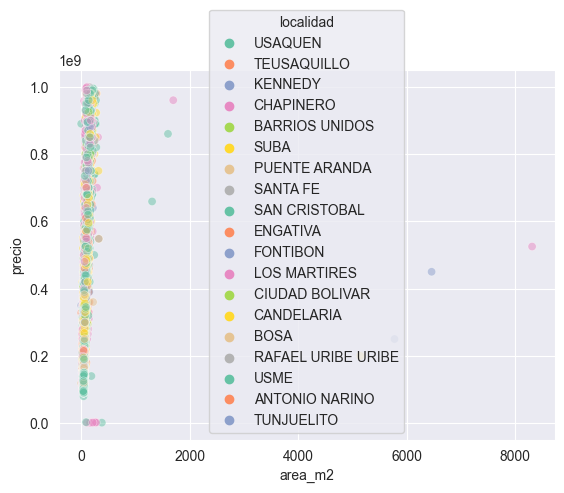

In [64]:
sns.scatterplot(
    data=apartamentos.loc[apa],
    x='area_m2',
    y='precio',
    alpha=0.5,
    palette='Set2'
)